<h3><center>TASK-3


**Task3**:Number Recognition  
**Domain**:DataScience  
**Batch**:August  

**Aim**:Handwritten digit Recognition Using MNIST dataset with the help of Neural Networks.  

#### Dataset Description:  
1)The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.  
2)Each image has (28*28 pixels),one pixel intensity,from 0 to 255. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.metrics import accuracy_score

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
##shape of the array
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


 **x_train:** uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.  
**y_train:** uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.  
**x_test:** uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.  
**y_test:** uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.  

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
#printing 25th image
x_train[38]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
##shape of the 25th image
x_train[38].shape

(28, 28)

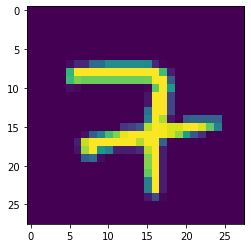

In [8]:
##displaying the image
plt.imshow(x_train[38])
plt.show()

In [9]:
##print corresponding label
y_train[38]

7

#### Scaling the values-Coverting all the xtrain and xtest values in b/w 0 to 1

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train[38]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Model Building

In [12]:
model=Sequential()
#Flatten is used to convert the data into 1 Dimensional 28*28=784inputs
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(150,activation='relu'))
#it is a multi classification(0-9),we hve to use softmax activation for multi class
model.add(Dense(10,activation='softmax'))

In [13]:
tf.random.set_seed(6)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"]) 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119260 (465.86 KB)
Trainable params: 119260 (465.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
##model fitting
history=model.fit(x_train,y_train,batch_size=128,epochs=20,validation_split=0.3,verbose=1)

Epoch 1/20
329/329 [==============================] - 4s 8ms/step - loss: 0.3983 - accuracy: 0.8899 - val_loss: 0.2219 - val_accuracy: 0.9384
Epoch 2/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1814 - accuracy: 0.9482 - val_loss: 0.1641 - val_accuracy: 0.9520
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1306 - accuracy: 0.9621 - val_loss: 0.1386 - val_accuracy: 0.9594
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1004 - accuracy: 0.9719 - val_loss: 0.1207 - val_accuracy: 0.9637
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.0816 - accuracy: 0.9765 - val_loss: 0.1100 - val_accuracy: 0.9678
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.0666 - accuracy: 0.9814 - val_loss: 0.1085 - val_accuracy: 0.9672
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.0555 - accuracy: 0.9842 - val_loss: 0.1027 - val_accuracy: 0.9700
Epoch 

In [17]:
##model.predict() gives the prediction probability of each class for the datapoint
ypred=model.predict(x_test)
ypred

313/313 [==============================] - 1s 3ms/step


array([[2.89542442e-07, 7.47643891e-10, 1.43529985e-06, ...,
        9.99978065e-01, 1.00947375e-07, 4.79243818e-06],
       [1.36708103e-10, 1.14360965e-07, 9.99999762e-01, ...,
        3.90926405e-16, 9.57638093e-08, 1.19642362e-14],
       [1.53326436e-08, 9.98614907e-01, 5.01735834e-04, ...,
        1.99543530e-04, 6.66308857e-04, 1.98126912e-07],
       ...,
       [3.88401240e-15, 2.46099239e-14, 1.62670581e-15, ...,
        3.60631125e-09, 1.55190083e-10, 5.09300468e-09],
       [4.27897491e-13, 2.95772467e-13, 1.49085260e-17, ...,
        1.88306591e-13, 1.10654419e-08, 3.64932693e-14],
       [6.61127819e-11, 2.20870109e-14, 4.59534551e-14, ...,
        5.14284557e-17, 9.94879075e-15, 1.76883995e-15]], dtype=float32)

In [18]:
ypred.shape

(10000, 10)

In [19]:
ypred[0]

array([2.89542442e-07, 7.47643891e-10, 1.43529985e-06, 1.53960736e-05,
       9.80880823e-14, 1.74855286e-09, 1.01858612e-13, 9.99978065e-01,
       1.00947375e-07, 4.79243818e-06], dtype=float32)

In [20]:
##it takes only one higher value from ypred
y_pred = ypred.argmax(axis=1) 

In [21]:
accuracy=accuracy_score(y_test,y_pred)

In [22]:
print("accuracy score: %.5f" %(accuracy))

accuracy score: 0.97800


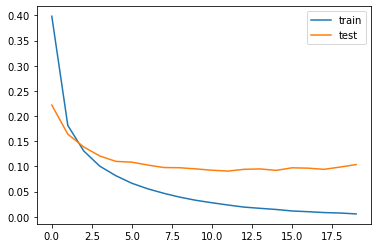

In [23]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

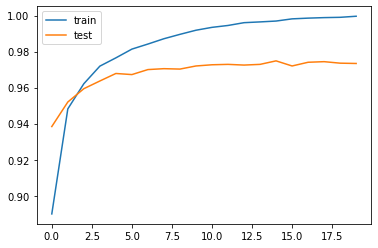

In [24]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

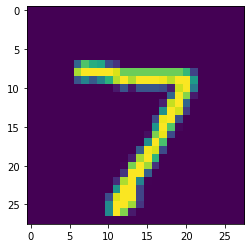

In [25]:
plt.imshow(x_test[0])

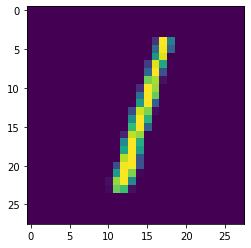

In [26]:
plt.imshow(x_test[2])

**Observation**:  
The accuracy score on the MNIST datset is __0.97800__.Hence it is Good Model.